In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

import sys
sys.path.append('..')
from src.data_prep import *



In [3]:
soldiers_df = load_dataset(FILEPATH_RAW)


In [4]:
soldiers_df.head()


,corps_level,division_level,brigade_level,mos,rank,age,gender,acft_history_average,current_acft_score,acft_fitness,...,sleep_trend,stress_trend,body_weight_trend,injury_recurrence_trend,optempo_trend,leadership_trust_index,unit_climate_score,weapons_qualification_score,weapons_qualification_expired,mandatory_training_complete
0,XVIII Airborne Corps,82nd ABN,CAB,13F,O5,42,Male,461.7,456.2,low,...,declining,improving,improving,stable,improving,32.0,72.7,33,0,1
1,XVIII Airborne Corps,101st ABN,CAB,35N,E6,27,Male,465.2,484.5,medium,...,improving,declining,stable,decreasing,stable,64.7,77.8,30,0,1
2,XVIII Airborne Corps,82nd ABN,4BCT,68W,O5,42,Male,448.7,439.4,low,...,declining,stable,declining,stable,stable,40.1,56.2,28,0,1
3,XVIII Airborne Corps,82nd ABN,3BCT,35F,E9,47,Male,488.1,488.3,medium,...,declining,declining,improving,stable,declining,32.8,75.6,25,0,0
4,XVIII Airborne Corps,10th MTN,1BCT,92Y,E9,48,Male,435.6,468.5,low,...,declining,stable,improving,stable,improving,60.2,66.8,27,0,1


In [5]:
print("Rows, Columns:", soldiers_df.shape)

Rows, Columns: (10000, 78)


In [6]:
soldiers_df.describe()

,age,acft_history_average,current_acft_score,acft_failure,body_mass_index,overweigth,pt_attendance,airborne_ops,jump_count,jump_frequency,...,years_at_unit,number_of_dependents,family_stress_score,financial_stress_score,credit_risk_flag,leadership_trust_index,unit_climate_score,weapons_qualification_score,weapons_qualification_expired,mandatory_training_complete
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,31.807500,470.63202,470.119170,0.597800,26.729730,0.461000,0.891389,15.028300,17.030100,1.768926,...,2.544170,1.743400,45.447580,42.094140,0.115900,59.844620,63.816580,27.331100,0.1163,0.798500
std,8.962917,43.77412,39.134699,0.490366,4.390448,0.498502,0.086491,3.891814,4.148122,2.340299,...,1.147084,1.173667,18.954603,21.639763,0.320121,14.710899,16.797653,6.405215,0.3206,0.401141
min,18.000000,308.60000,360.000000,0.000000,11.000000,0.000000,0.497000,3.000000,4.000000,0.120000,...,0.000000,0.000000,0.000000,0.100000,0.000000,7.000000,2.100000,2.000000,0.0000,0.000000
25%,24.000000,441.30000,443.875000,0.000000,23.700000,0.000000,0.831750,12.000000,14.000000,0.590000,...,1.700000,1.000000,32.000000,25.700000,0.000000,50.000000,52.400000,23.000000,0.0000,1.000000
50%,31.000000,471.05000,470.100000,1.000000,26.600000,0.000000,0.898000,15.000000,17.000000,0.890000,...,2.500000,2.000000,45.200000,40.800000,0.000000,59.800000,64.200000,28.000000,0.0000,1.000000
75%,39.000000,500.50000,496.800000,1.000000,29.600000,1.000000,0.968000,18.000000,20.000000,1.700000,...,3.300000,2.000000,58.700000,57.300000,0.000000,70.000000,76.000000,32.000000,0.0000,1.000000
max,54.000000,612.40000,600.000000,1.000000,48.400000,1.000000,1.000000,32.000000,35.000000,12.000000,...,7.100000,6.000000,99.600000,99.900000,1.000000,99.900000,100.000000,40.000000,1.0000,1.000000


In [7]:
soldiers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   corps_level                     10000 non-null  object 
 1   division_level                  10000 non-null  object 
 2   brigade_level                   10000 non-null  object 
 3   mos                             10000 non-null  object 
 4   rank                            10000 non-null  object 
 5   age                             10000 non-null  int64  
 6   gender                          10000 non-null  object 
 7   acft_history_average            10000 non-null  float64
 8   current_acft_score              10000 non-null  float64
 9   acft_fitness                    10000 non-null  object 
 10  acft_failure                    10000 non-null  int64  
 11  physical_activity               10000 non-null  object 
 12  profile_status                  1

In [8]:
soldiers_df.isna().mean().sort_values(ascending=False).head(20)

corps_level                 0.0
division_level              0.0
brigade_level               0.0
mos                         0.0
rank                        0.0
age                         0.0
gender                      0.0
acft_history_average        0.0
current_acft_score          0.0
acft_fitness                0.0
acft_failure                0.0
physical_activity           0.0
profile_status              0.0
body_mass_index             0.0
overweigth                  0.0
pt_attendance               0.0
nutrition                   0.0
height_and_weight_trends    0.0
airborne_ops                0.0
jump_count                  0.0
dtype: float64

Text(0.5, 0, 'Columns')

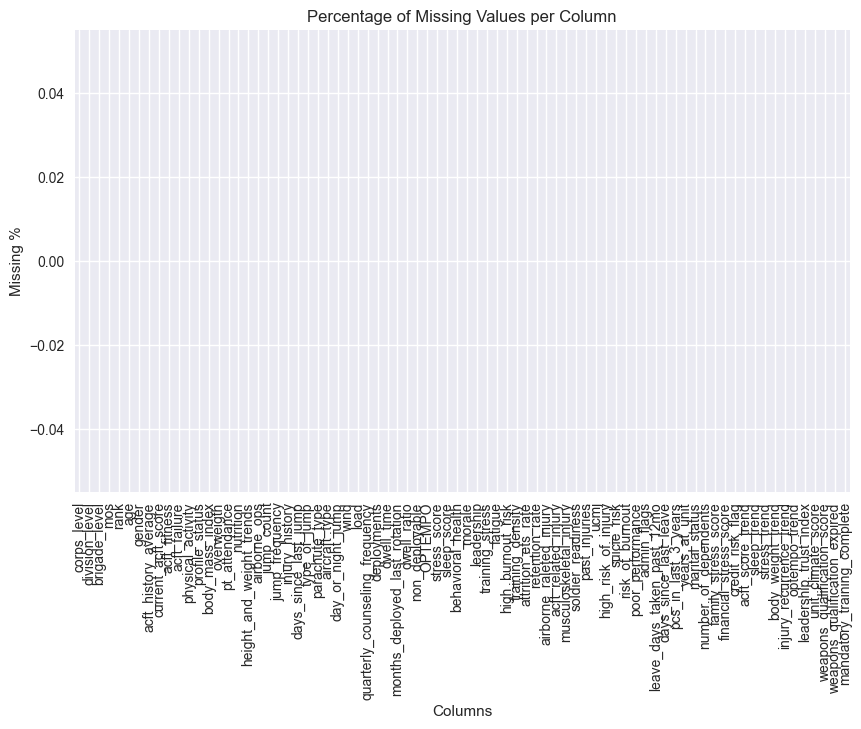

In [9]:
plt.figure(figsize=(10,6))
soldiers_df.isna().mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Missing %")
plt.xlabel("Columns")


In [10]:
soldiers_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,10000.0,31.807500,8.962917,18.000,24.00000,31.000,39.000000,54.000000
acft_history_average,10000.0,470.632020,43.774120,308.600,441.30000,471.050,500.500000,612.400000
current_acft_score,10000.0,470.119170,39.134699,360.000,443.87500,470.100,496.800000,600.000000
acft_failure,10000.0,0.597800,0.490366,0.000,0.00000,1.000,1.000000,1.000000
body_mass_index,10000.0,26.729730,4.390448,11.000,23.70000,26.600,29.600000,48.400000
overweigth,10000.0,0.461000,0.498502,0.000,0.00000,0.000,1.000000,1.000000
pt_attendance,10000.0,0.891389,0.086491,0.497,0.83175,0.898,0.968000,1.000000
airborne_ops,10000.0,15.028300,3.891814,3.000,12.00000,15.000,18.000000,32.000000
jump_count,10000.0,17.030100,4.148122,4.000,14.00000,17.000,20.000000,35.000000
jump_frequency,10000.0,1.768926,2.340299,0.120,0.59000,0.890,1.700000,12.000000


In [11]:
soldiers_df.select_dtypes("object").describe().T


,count,unique,top,freq
corps_level,10000,1,XVIII Airborne Corps,10000
division_level,10000,4,82nd ABN,5966
brigade_level,10000,6,4BCT,1731
mos,10000,16,35N,656
rank,10000,20,E4,543
gender,10000,3,Male,8198
acft_fitness,10000,3,low,5978
physical_activity,10000,3,medium,4993
profile_status,10000,3,none,6975
nutrition,10000,4,average,3964


In [12]:
# binarize values in soldier_readiness feature. Values in soldier_readinerss are float
# sample from soldier_readiness feature: 0.236, 0.452, 0.482, 0.339, 0.644, 0.72, 0.69, 0.644, 0.421

soldiers_df["soldier_readiness_bin"] = np.where(soldiers_df["soldier_readiness"] >= 0.5, "ready", "not_ready")
# soldiers_df = soldiers_df.drop(columns=["soldier_readiness_binary"])
soldiers_df = soldiers_df.rename(columns={"airborne_raleted_injury": "airborne_related_injury", 
                                          "overweigth": "overweight", "suicie_risk": "suicide_risk"})
soldiers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   corps_level                     10000 non-null  object 
 1   division_level                  10000 non-null  object 
 2   brigade_level                   10000 non-null  object 
 3   mos                             10000 non-null  object 
 4   rank                            10000 non-null  object 
 5   age                             10000 non-null  int64  
 6   gender                          10000 non-null  object 
 7   acft_history_average            10000 non-null  float64
 8   current_acft_score              10000 non-null  float64
 9   acft_fitness                    10000 non-null  object 
 10  acft_failure                    10000 non-null  int64  
 11  physical_activity               10000 non-null  object 
 12  profile_status                  1

In [38]:
# Create low_morale (1 = low morale)
soldiers_df["low_morale"] = (
    soldiers_df["morale"]
    .astype(str)
    .str.lower()
    .isin(["low", "poor"])
    .astype(int)
)


# Create poor_behavioral_health (1 = poor behavioral health)
soldiers_df["poor_behavioral_health"] = (
    soldiers_df["behavioral_health"]
    .astype(str)
    .str.lower()
    .isin(["poor", "severe"])
    .astype(int)
)

soldiers_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   corps_level                     10000 non-null  object 
 1   division_level                  10000 non-null  object 
 2   brigade_level                   10000 non-null  object 
 3   mos                             10000 non-null  object 
 4   rank                            10000 non-null  object 
 5   age                             10000 non-null  int64  
 6   gender                          10000 non-null  object 
 7   acft_history_average            10000 non-null  float64
 8   current_acft_score              10000 non-null  float64
 9   acft_fitness                    10000 non-null  object 
 10  acft_failure                    10000 non-null  int64  
 11  physical_activity               10000 non-null  object 
 12  profile_status                  1

Text(0, 0.5, 'Frequency')

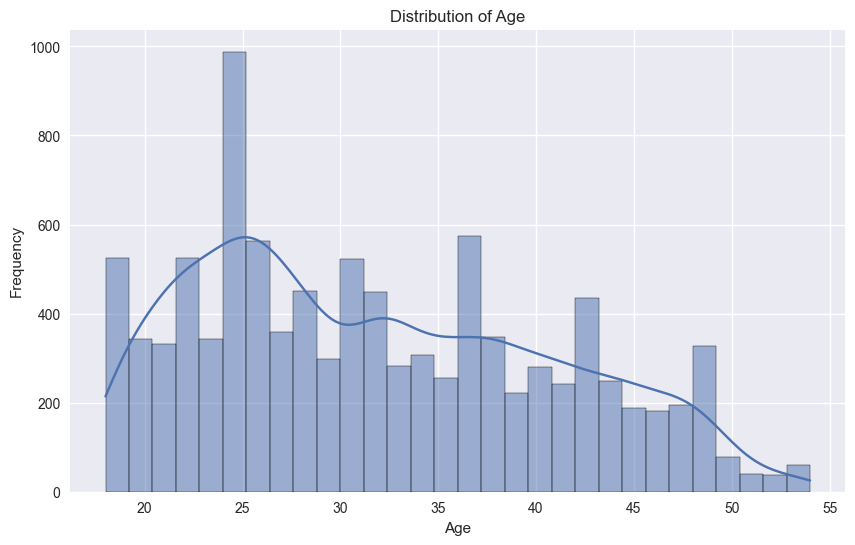

In [26]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(soldiers_df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'E4'),
  Text(1, 0, 'O2'),
  Text(2, 0, 'W4'),
  Text(3, 0, 'E5'),
  Text(4, 0, 'O3'),
  Text(5, 0, 'O1'),
  Text(6, 0, 'E7'),
  Text(7, 0, 'W1'),
  Text(8, 0, 'E9'),
  Text(9, 0, 'E3'),
  Text(10, 0, 'W3'),
  Text(11, 0, 'O4'),
  Text(12, 0, 'W5'),
  Text(13, 0, 'E2'),
  Text(14, 0, 'O6'),
  Text(15, 0, 'W2'),
  Text(16, 0, 'O5'),
  Text(17, 0, 'E6'),
  Text(18, 0, 'E1'),
  Text(19, 0, 'E8')])

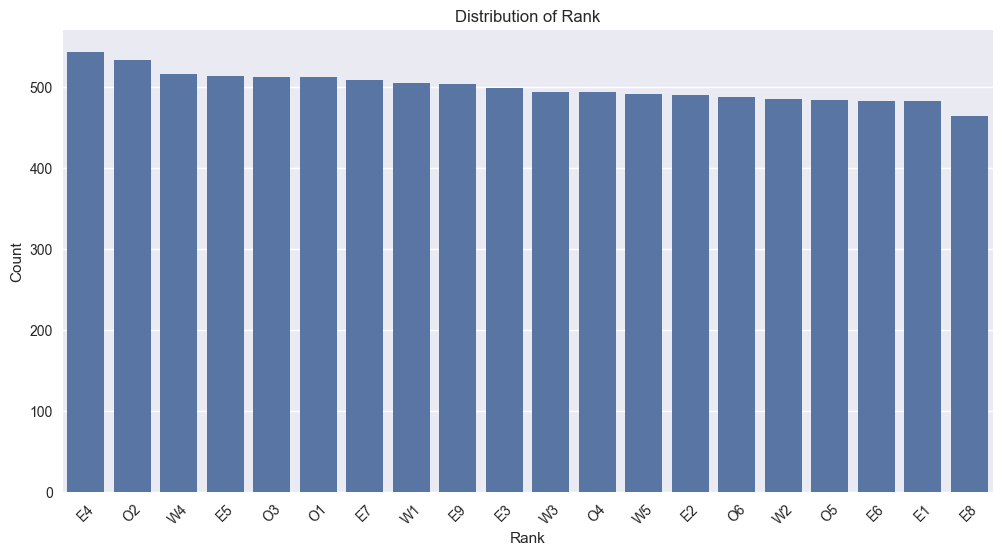

In [27]:
# Distribution of Rank
plt.figure(figsize=(12, 6))
sns.countplot(data=soldiers_df, x='rank', order=soldiers_df['rank'].value_counts().index)
plt.title('Distribution of Rank') 
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xticks(rotation=45)


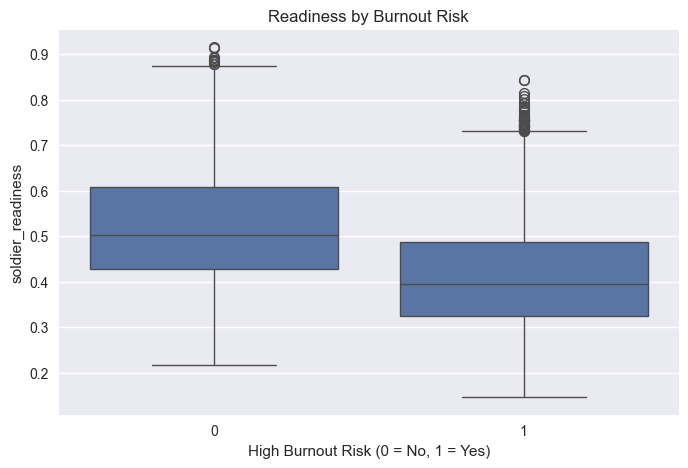

In [28]:
# Soldiers Readiness vs Burnout Risk
plt.figure(figsize=(8,5))
sns.boxplot(data=soldiers_df, x="high_burnout_risk", y="soldier_readiness")
plt.title("Readiness by Burnout Risk")
plt.xlabel("High Burnout Risk (0 = No, 1 = Yes)")
plt.show()


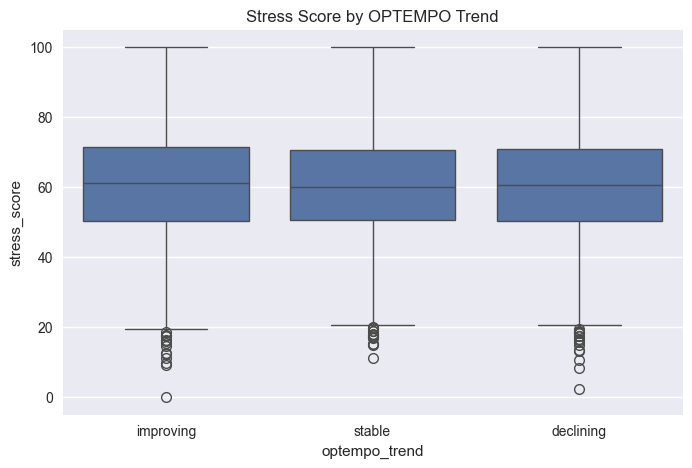

In [29]:
#Stress Scores by OPTEMPO Trend (for hypothesis test preview)
plt.figure(figsize=(8,5))
sns.boxplot(data=soldiers_df, x="optempo_trend", y="stress_score")
plt.title("Stress Score by OPTEMPO Trend")
plt.show()



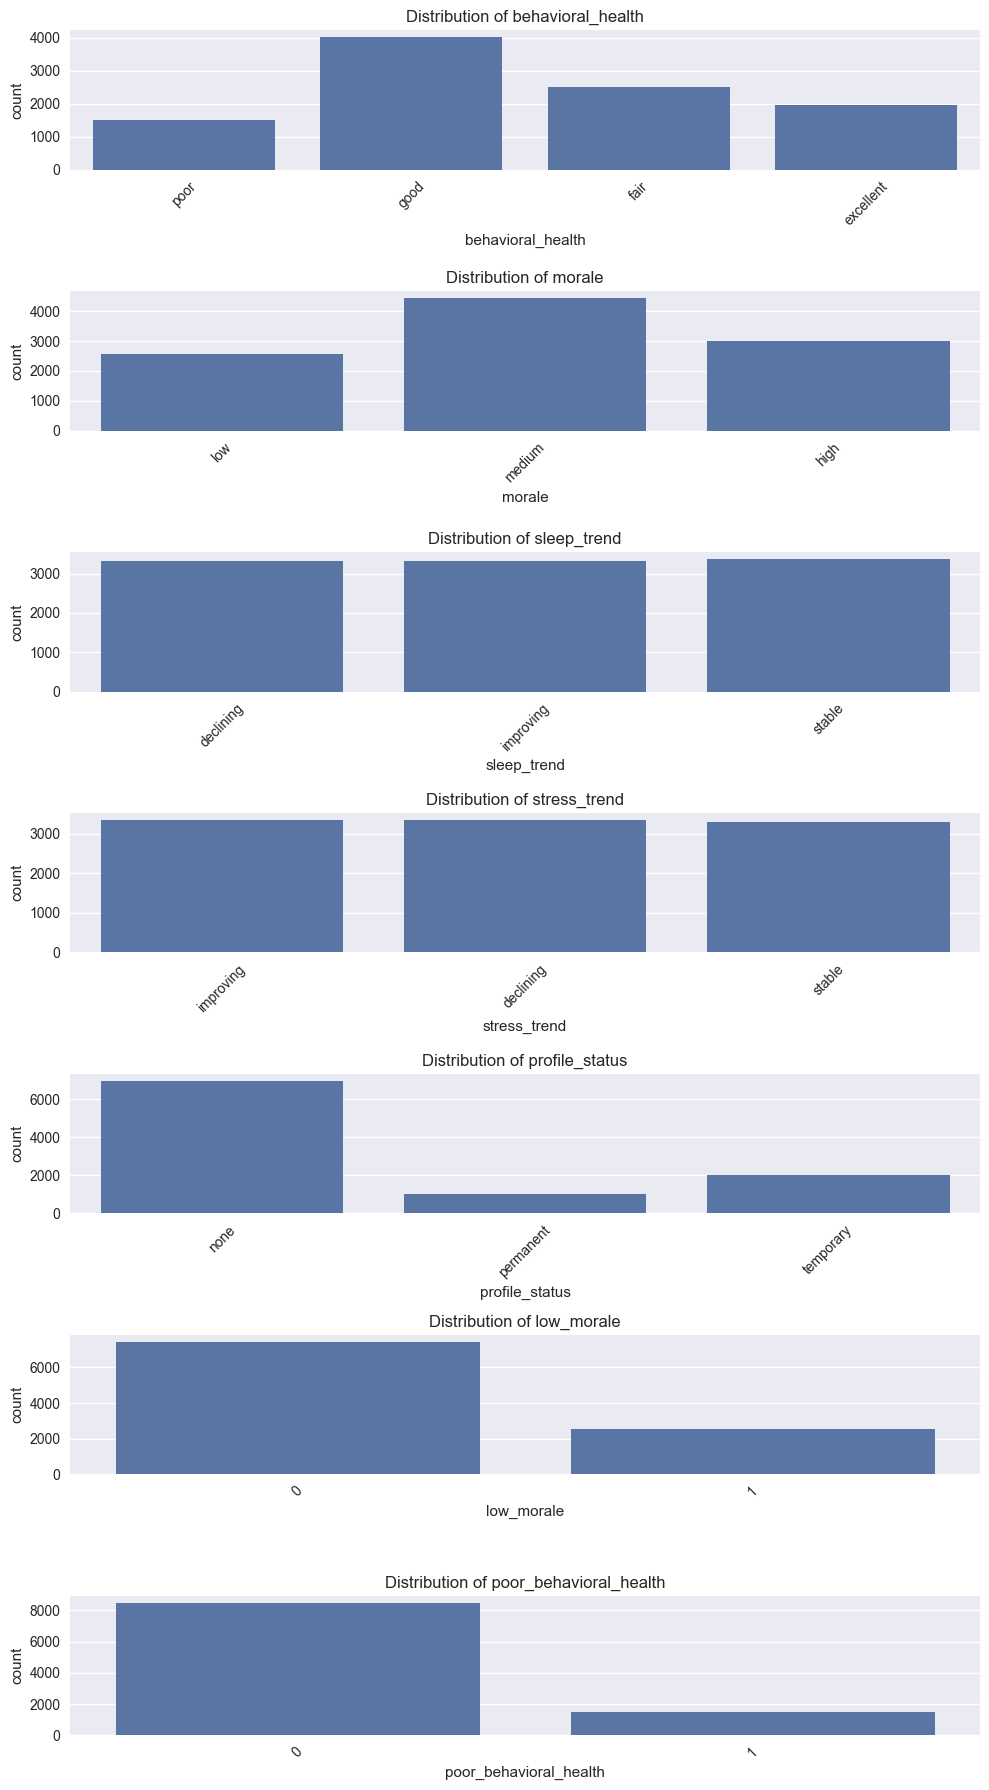

In [30]:
# Categorical Feature (CountPlot)
cat_cols = ["behavioral_health", "morale", "sleep_trend", "stress_trend", "profile_status", "low_morale", "poor_behavioral_health"]

fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 18))

for i, col in enumerate(cat_cols):
    sns.countplot(data=soldiers_df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


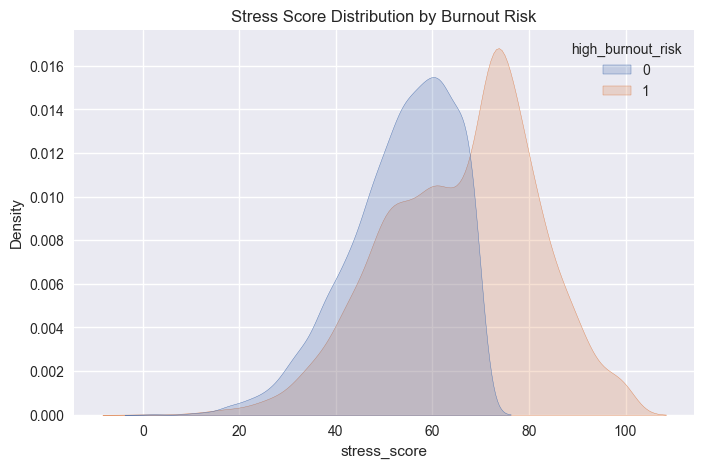

In [31]:
# Stress Score vs Burnout
plt.figure(figsize=(8,5))
sns.kdeplot(data=soldiers_df, x="stress_score", hue="high_burnout_risk", fill=True)
plt.title("Stress Score Distribution by Burnout Risk")
plt.show()


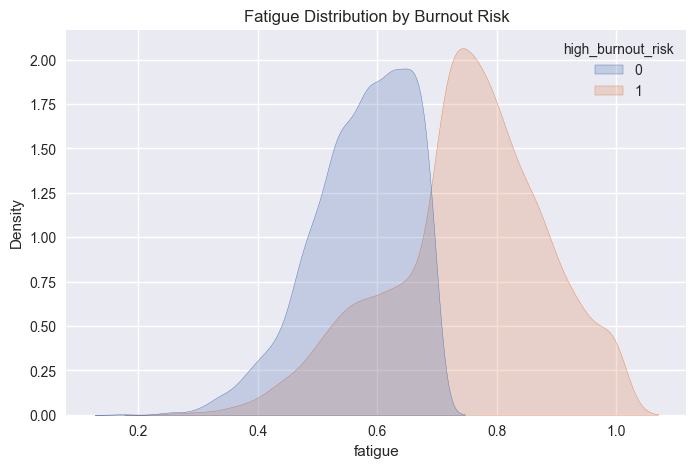

In [32]:
# Fatigue vs Burnout
plt.figure(figsize=(8,5))
sns.kdeplot(data=soldiers_df, x="fatigue", hue="high_burnout_risk", fill=True)
plt.title("Fatigue Distribution by Burnout Risk")
plt.show()


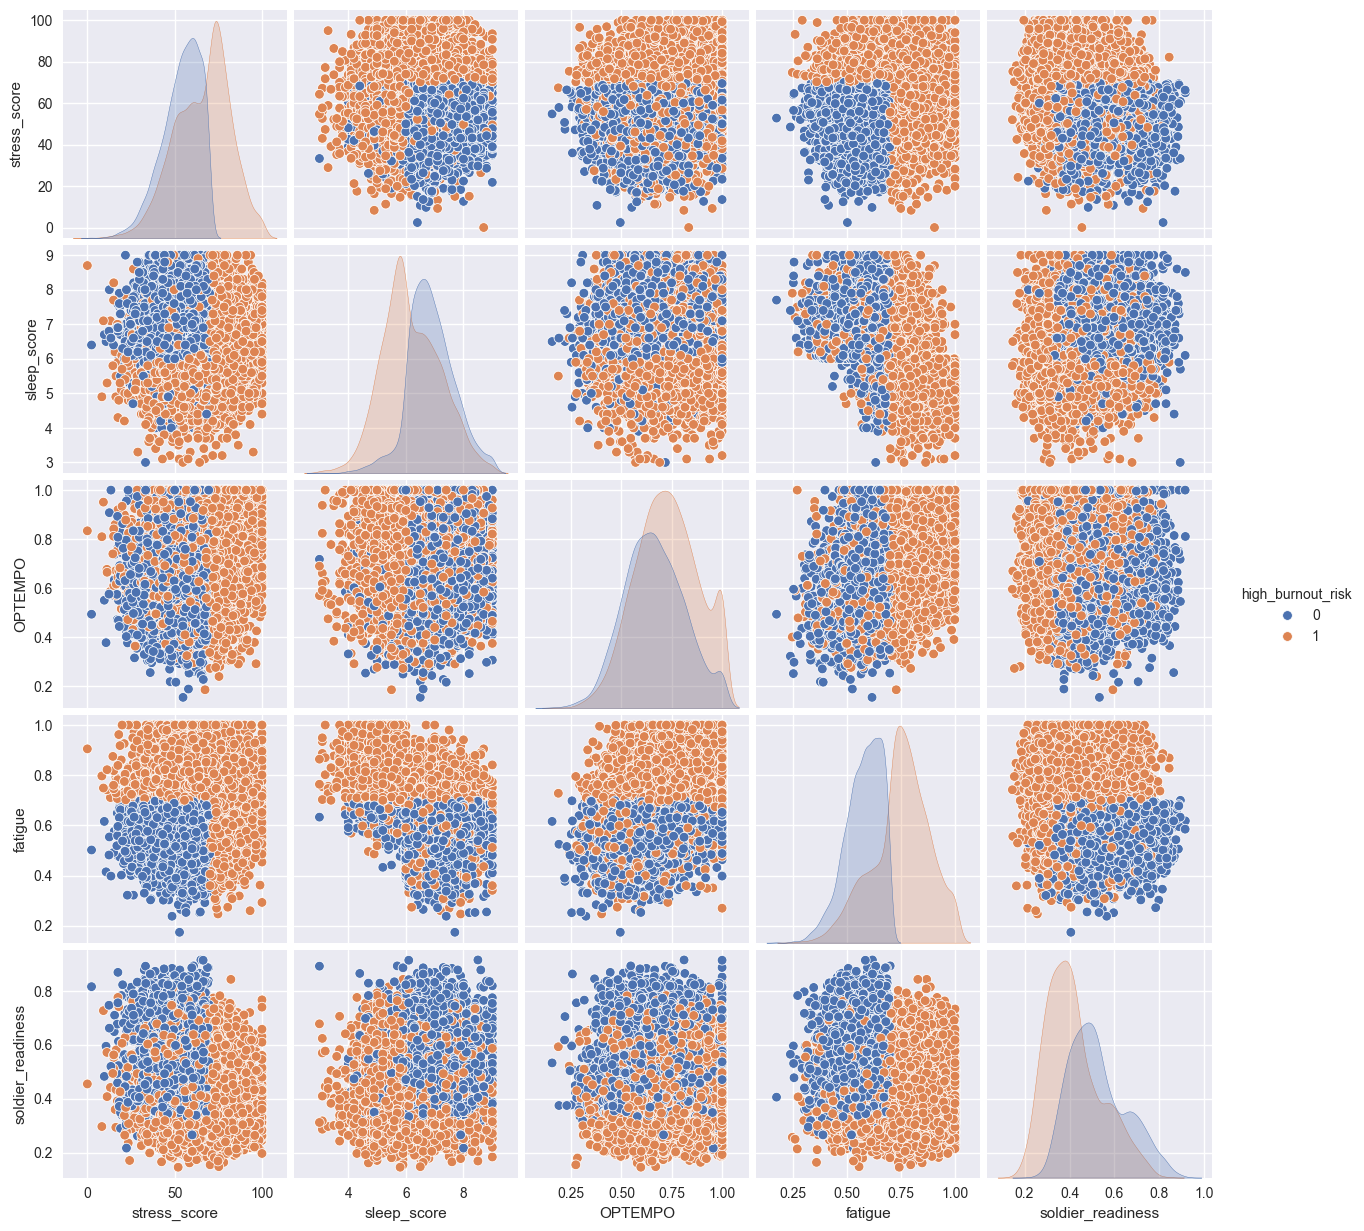

In [33]:
# Feature Interactions (Pairplot)
small = soldiers_df[["stress_score", "sleep_score", "OPTEMPO", "fatigue", "soldier_readiness", "high_burnout_risk"]]

sns.pairplot(small, hue="high_burnout_risk")
plt.show()


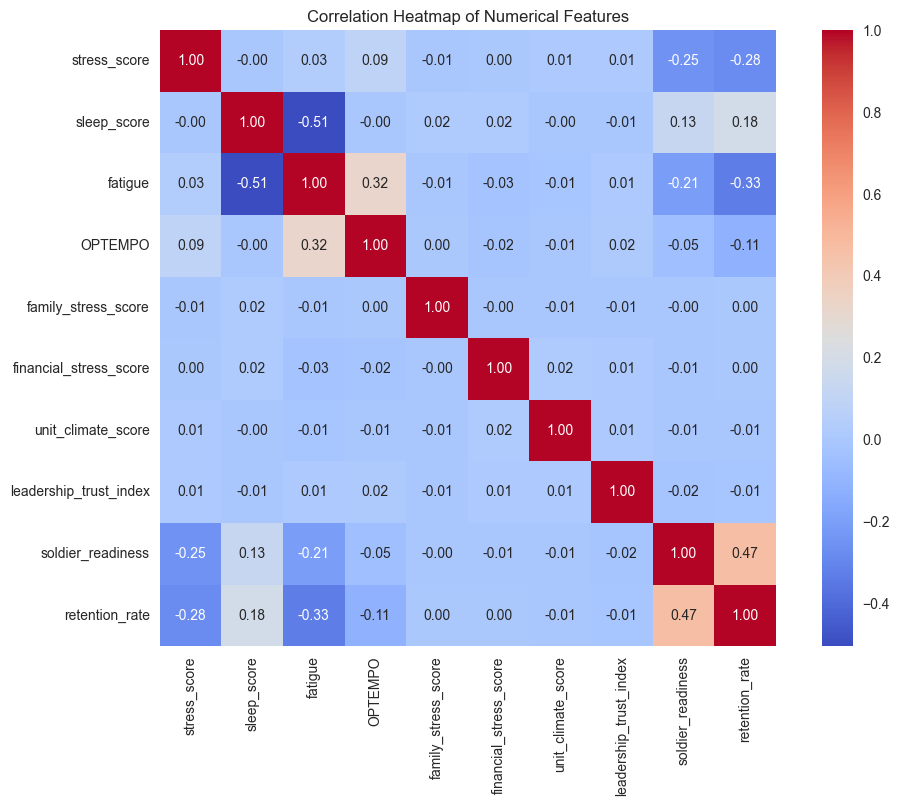

In [34]:
# Correlation heatmap of numerical features

"""
 commander_caption("Correlations are directional hints—not causation—but they help identify where risks cluster (stress, fatigue, OPTEMPO, sleep).")
"""
plt.figure(figsize=(12, 8))
corr = soldiers_df[[
        "stress_score", "sleep_score", "fatigue", "OPTEMPO",
        "family_stress_score", "financial_stress_score",
        "unit_climate_score", "leadership_trust_index",
        "soldier_readiness", "retention_rate"
    ]].select_dtypes(include=np.number).corr()  
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [39]:

# Example: df is your DataFrame; cols are the columns you want to include
# df = ...
# cols = [...]

# Keep only requested columns that exist

cols = [
    "marital_status",
    "pcs_in_last_3_years",
    "rank",
    "mos",
    "corps_level",
    "division_level",
    "brigade_level",
    "type_of_jump",
    "day_or_night_jump",
    "parachute_type",
    "aircraft_type",
    "load",
    "stress_trend",
    "sleep_trend",
    "optempo_trend",
    "behavioral_health",
    "morale",
    "acft_score_trend",
    "low_morale",
    "poor_behavioral_health",
    "acft_failure",
]




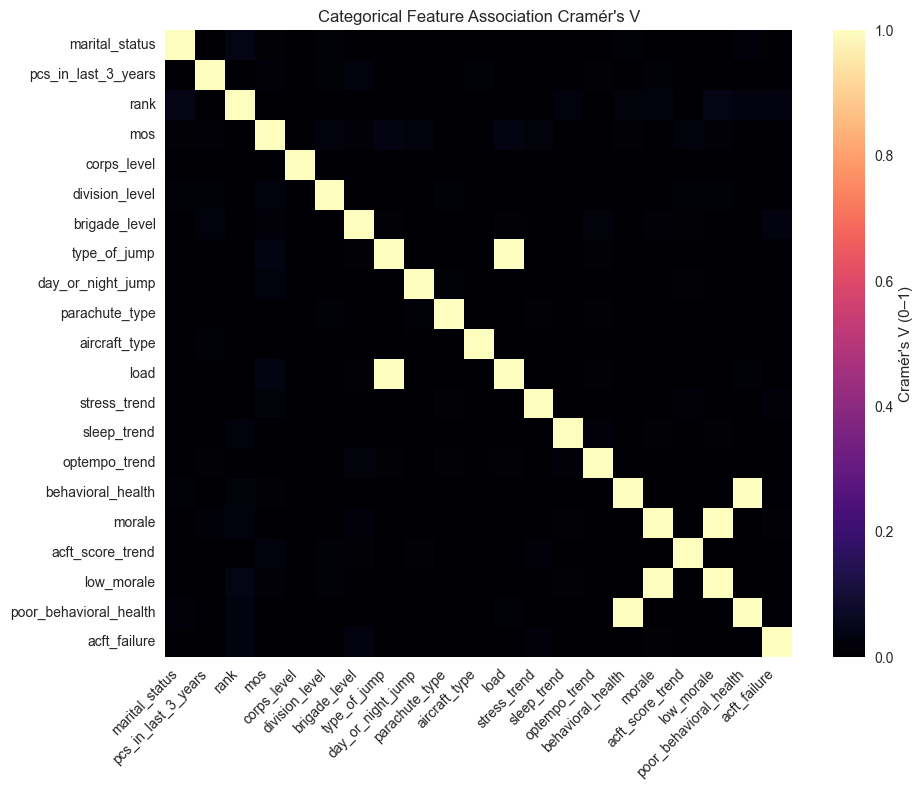

In [40]:

# Keep only those that actually exist
cols = [c for c in cols if c in soldiers_df.columns]

# Basic guard
if len(cols) < 2:
    print("Not enough columns to compute categorical associations.")
else:
    # Ensure categorical dtype and handle missing values consistently
    df_cat = soldiers_df[cols].copy()
    for c in df_cat.columns:
        # Fill NaN with a sentinel and cast to string (or 'category')
        df_cat[c] = df_cat[c].astype(str).fillna("Missing")

    def cramers_v_bias_corrected(x, y):
        """
        Cramér's V with bias correction (Bergsma 2013; using chi2_contingency).
        Suitable for nominal categorical variables.
        """
        tbl = pd.crosstab(x, y)
        chi2, _, _, _ = chi2_contingency(tbl)
        n = tbl.values.sum()
        r, k = tbl.shape
        # Raw phi-squared
        phi2 = chi2 / n
        # Bias correction
        phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        r_corr = r - ((r - 1) ** 2) / (n - 1)
        k_corr = k - ((k - 1) ** 2) / (n - 1)
        # Guard against division by zero
        denom = min(r_corr - 1, k_corr - 1)
        if denom <= 0:
            return 0.0
        return np.sqrt(phi2_corr / denom)

    # Build the association matrix
    m = len(cols)
    assoc = pd.DataFrame(np.zeros((m, m)), index=cols, columns=cols)

    for i, ci in enumerate(cols):
        for j, cj in enumerate(cols):
            if j < i:
                assoc.iloc[i, j] = assoc.iloc[j, i]  # symmetry
            elif j == i:
                assoc.iloc[i, j] = 1.0
            else:
                assoc.iloc[i, j] = cramers_v_bias_corrected(df_cat[ci], df_cat[cj])

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        assoc,
        cmap="magma",     
        vmin=0, vmax=1,
        square=True,
        annot=False,      
        cbar_kws={"label": "Cramér's V (0–1)"}
    )
    plt.title("Categorical Feature Association Cramér's V")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()



In [41]:
"""Saves the cleaned DataFrame to a excel file."""

cleaned_soldiers_dataset = save_cleaned_dataset(soldiers_df, FILEPATH_CLEANED)
